In [1]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

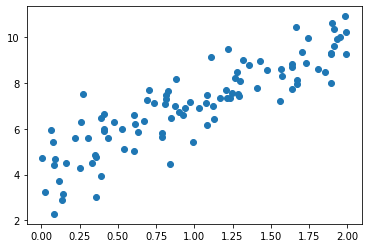

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # theta = (XT.X)-1.XT.y
theta_best

array([[4.26866896],
       [2.80081624]])

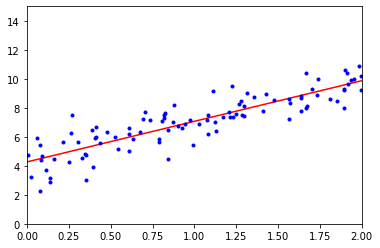

In [4]:
X_ = np.array([[0], [2]])
x_ = np.c_[np.ones((2, 1)), X_]
y_ = x_.dot(theta_best)
plt.plot(X_, y_, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X, y)
lin_model.intercept_, lin_model.coef_

(array([4.26866896]), array([[2.80081624]]))

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.26866896],
       [2.80081624]])

In [7]:
np.linalg.pinv(X_b).dot(y)

array([[4.26866896],
       [2.80081624]])

In [8]:
eta = 0.02 # learning rate 
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

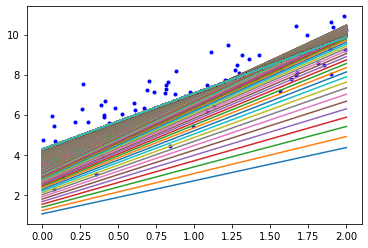

In [9]:
plt.plot(X, y, 'b.')
x_ = np.c_[np.ones((2, 1)), X_]
for i in range(n_iterations):
    gradient = 2 * X_b.T.dot(X_b.dot(theta) - y) / m 
    theta -= eta * gradient
    y_ = x_.dot(theta)
    plt.plot(X_ , y_)

In [10]:
theta

array([[4.26675407],
       [2.80243572]])

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t): 
    return t0/(t+t1)

In [12]:
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs): 
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [13]:
theta

array([[4.28738838],
       [2.79088784]])

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None)
sgd_model.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
sgd_model.intercept_, sgd_model.coef_

(array([4.31437301]), array([2.90318647]))

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

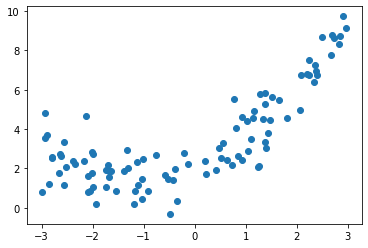

In [17]:
plt.scatter(X, y)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X[0], X_poly[0]

(array([1.34520909]), array([1.34520909, 1.80958751]))

In [20]:
lin_model.fit(X_poly, y)

LinearRegression()

In [21]:
lin_model.coef_, lin_model.intercept_

(array([[1.06257607, 0.46531784]]), array([2.03138957]))

array([[2.03138957, 1.06257607, 0.46531784]])

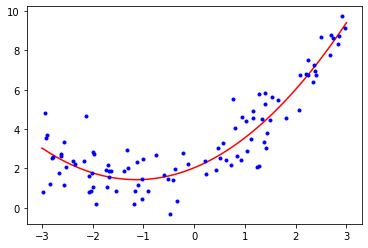

In [22]:
X_ = np.linspace(-3, 3, 1000)
X_square = np.square(X_)
x_ = np.c_[np.ones((1000, 1)), X_, X_square]
theta = np.c_[lin_model.intercept_, lin_model.coef_]
y_ = x_.dot(theta.T)
plt.plot(X_, y_, 'r-')
plt.plot(X, y, 'b.')
theta

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val) 
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) 
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train") 
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

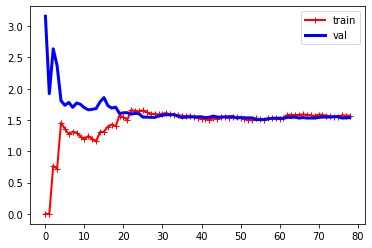

In [24]:
plot_learning_curves(lin_model, X, y)

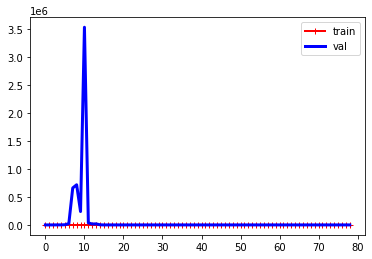

In [25]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),]) 
plot_learning_curves(polynomial_regression, X, y)

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, solver='cholesky')
ridge.fit(X, y)
ridge.predict([[1.5]])

array([[5.03055531]])

In [27]:
sgd_reg_l2 = SGDRegressor(penalty='l2')
sgd_reg_l2.fit(X, y.ravel())
sgd_reg_l2.predict([[1.5]])

array([5.0124666])

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.predict([[1.5]])

array([4.98583539])

In [29]:
sgd_reg_l1 = SGDRegressor(penalty='l1')
sgd_reg_l1.fit(X, y.ravel())
sgd_reg_l1.predict([[1.5]])

array([5.0067525])

In [30]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.98718589])

In [31]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) 

X_train_poly_scaled = poly_scaler.fit_transform(X_train) 
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off 
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch

907

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

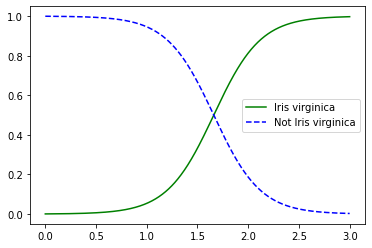

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()

In [36]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [37]:
X = iris["data"][:, (2, 3)] # petal length, petal width 
y = iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial', C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [38]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [39]:
import pandas as pd
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
df - df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
